In [ ]:
# Bir makina öğrenmesi modelinde amaç: Genelleştirme (generalization)

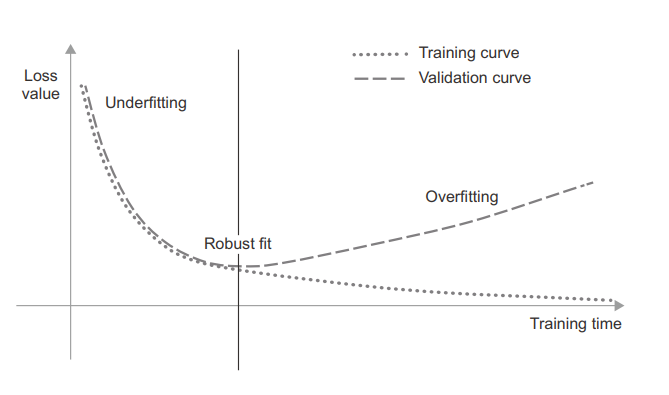

Undefitting (az öğrenme), Optimum öğrenme, ve Overfitting (aşırı öğrenme)

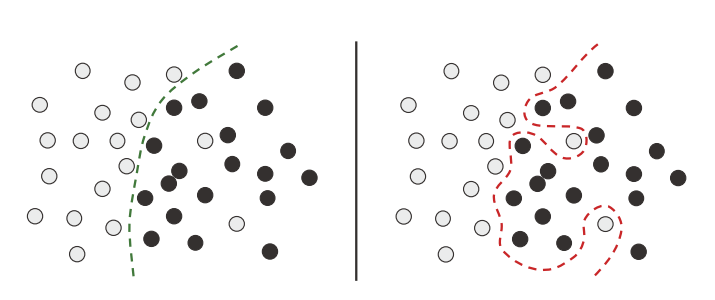

Optimum öğrenme ve Aşırı öğrenme (overfit)

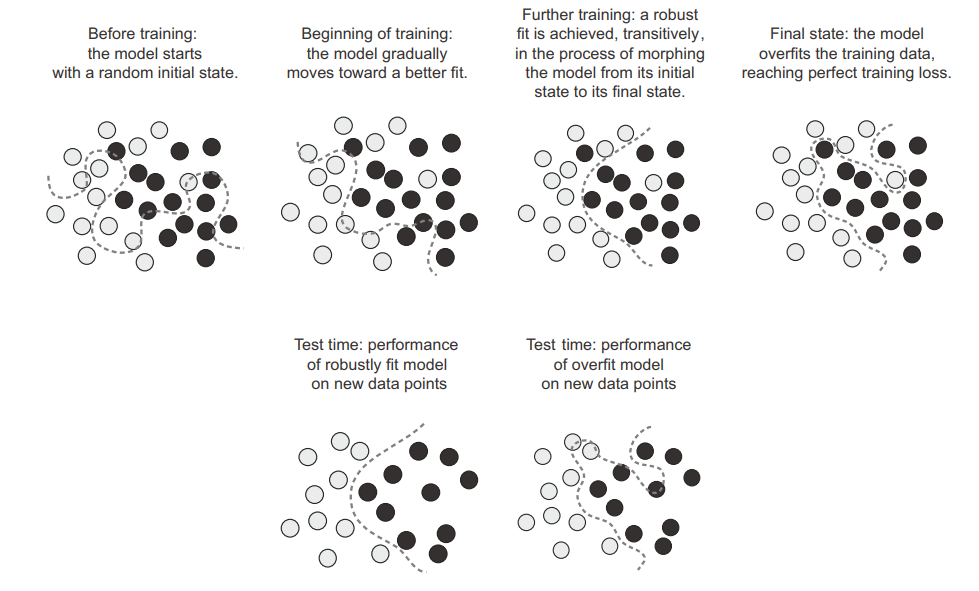
Makine öğrenmesi modelinin geliştirilmesi

In [ ]:
# Başarılı bir model geliştirmek için eğitim verisinin yeterince büyük olması gereklidir.

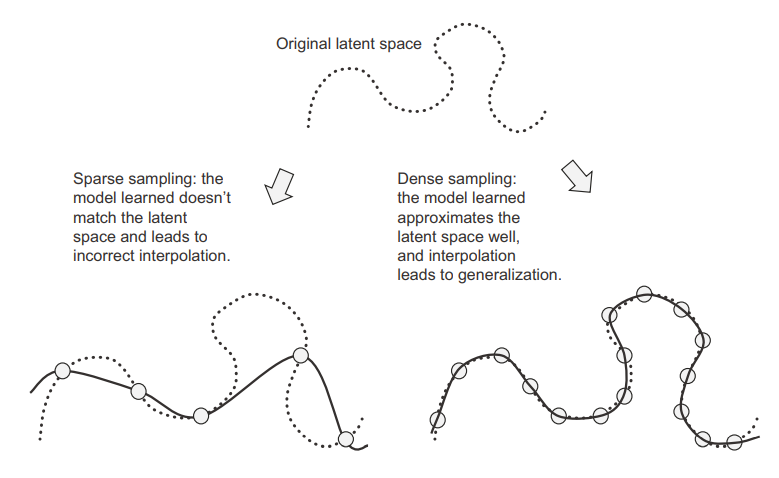

In [1]:
# Geliştirilen model, model kullanmadan da elde edilebilecek başarılı tahmininin üzerinde bir performans göstermelidir.

In [2]:
# Bir modelin "iyileştirilmesi" (daha başarılı tahmin yapabilmesi) için neler yapılabilir?
# Problem-1: Öğrenme 'başlamıyor' olabilir. (loss value azalmıyor)
# Problem-2: Öğrenme başlamış olmasına rağmen, tahmin performansı düşük kalabilir. (Rasgele bir tahmini bile geçemeyebilir!)
# Problem-3: Overfit aşamasına geçilemeyebilir (Underfit aşaması uzun sürebilir.)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")/255

In [7]:
model = keras.Sequential([
                          layers.Dense(512, activation="relu"),
                          layers.Dense(10, activation="softmax")                   
])

In [8]:
model.compile(optimizer=keras.optimizers.RMSprop(1.), # Learning rate = 1. (yeterli olmayan bir öğrenme oranı)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.20)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 1044.2358 - accuracy: 0.3697 - val_loss: 2.2206 - val_accuracy: 0.2186
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 3.1049 - accuracy: 0.2192 - val_loss: 4.0936 - val_accuracy: 0.1776
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 3.0352 - accuracy: 0.1980 - val_loss: 2.3684 - val_accuracy: 0.2104
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5307 - accuracy: 0.1900 - val_loss: 2.2047 - val_accuracy: 0.2016
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 3.0833 - accuracy: 0.2071 - val_loss: 2.1490 - val_accuracy: 0.2368
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.4417 - accuracy: 0.2181 - val_loss: 2.4385 - val_accuracy: 0.2333
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5927 - accuracy: 0.2367 - val_loss: 2.0063 - val_accuracy: 0.2

In [10]:
# Öğrenme başlamadı. Problem: optimizer'ın "learning_rate" parametresi doğru olarak seçilmediği için.

In [11]:
# Problemin çözümü: Optimize "öğrenme oranı" (learning rate) değiştir => 0.01
model = keras.Sequential([
                          layers.Dense(512, activation="relu"),
                          layers.Dense(10, activation="softmax")                   
])

model.compile(optimizer=keras.optimizers.RMSprop(0.01), # Learning rate = 0.01 (daha uygun bir öğrenme oranı)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.20)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3590 - accuracy: 0.9103 - val_loss: 0.1680 - val_accuracy: 0.9537
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1390 - accuracy: 0.9635 - val_loss: 0.1560 - val_accuracy: 0.9682
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1161 - accuracy: 0.9715 - val_loss: 0.1631 - val_accuracy: 0.9687
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0961 - accuracy: 0.9789 - val_loss: 0.1734 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0833 - accuracy: 0.9811 - val_loss: 0.2345 - val_accuracy: 0.9685
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0734 - accuracy: 0.9843 - val_loss: 0.2279 - val_accuracy: 0.9700
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0701 - accuracy: 0.9862 - val_loss: 0.2713 - val_accuracy: 0.9647


In [ ]:
# Learning rate 0.01 değeri ile öğrenme başladı. Doğruluk oranı (accuracy) arttı.

In [13]:
# Doğrulama seti doğruluk oranı problemi:
model = keras.Sequential([
                          layers.Dense(10, activation="softmax")      # Sadece output layer var (Bu hali ile bir "Logistic Regression" modelidir.)             
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.20)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6615 - accuracy: 0.8393 - val_loss: 0.3595 - val_accuracy: 0.9021
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9036 - val_loss: 0.3075 - val_accuracy: 0.9141
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9122 - val_loss: 0.2897 - val_accuracy: 0.9203
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2996 - accuracy: 0.9169 - val_loss: 0.2813 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9190 - val_loss: 0.2766 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2834 - accuracy: 0.9207 - val_loss: 0.2720 - val_accuracy: 0.9267
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2783 - accuracy: 0.9213 - val_loss: 0.2697 - val_accuracy: 0.9262
Epoch 

In [15]:
# Doğrulama seti doğruluk oranı problem çözümü:
model = keras.Sequential([
                          layers.Dense(96, activation="relu"),
                          layers.Dense(96, activation="relu"),
                          layers.Dense(10, activation="softmax")                   
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.20)

Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 0.3570 - accuracy: 0.8997 - val_loss: 0.1759 - val_accuracy: 0.9497
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1545 - accuracy: 0.9545 - val_loss: 0.1364 - val_accuracy: 0.9608
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9670 - val_loss: 0.1138 - val_accuracy: 0.9659
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0843 - accuracy: 0.9744 - val_loss: 0.1011 - val_accuracy: 0.9700
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0672 - accuracy: 0.9802 - val_loss: 0.1045 - val_accuracy: 0.9704
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0995 - val_accuracy: 0.9704
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.1054 - val_accuracy: 0.9710
Epoch 

In [16]:
# Early stopping
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
                          layers.Dense(96, activation="relu"),
                          layers.Dense(96, activation="relu"),
                          layers.Dense(10, activation="softmax")                   
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.20, callbacks=[callback])

Epoch 1/50
375/375 [==============================] - 4s 8ms/step - loss: 0.3639 - accuracy: 0.8984 - val_loss: 0.1894 - val_accuracy: 0.9454
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1634 - accuracy: 0.9515 - val_loss: 0.1326 - val_accuracy: 0.9604
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9656 - val_loss: 0.1066 - val_accuracy: 0.9689
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0888 - accuracy: 0.9730 - val_loss: 0.1024 - val_accuracy: 0.9674
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0976 - val_accuracy: 0.9708
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0975 - val_accuracy: 0.9715
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.1004 - val_accuracy: 0.9723
Epoch 

In [17]:
len(history.history["loss"]) # optimum model için epochs = 34

34

In [18]:
# IMDB veriseti
from keras.datasets import imdb

In [19]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [20]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize_sequences(train_data)

In [31]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_1 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.9787 - accuracy: 0.7869 - val_loss: 0.7801 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.7275 - accuracy: 0.8689 - val_loss: 0.6918 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.6619 - accuracy: 0.8765 - val_loss: 0.6512 - val_accuracy: 0.8635
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6175 - accuracy: 0.8755 - val_loss: 0.6269 - val_accuracy: 0.8541
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5834 - accuracy: 0.8801 - val_loss: 0.5953 - val_accuracy: 0.8584
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5544 - accuracy: 0.8788 - val_loss: 0.5567 - val_accuracy: 0.8723
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5278 - accuracy: 0.8862 - val_loss: 0.5756 - val_accuracy: 0.8433
Epoch 8/20
30

In [22]:
# DAHA KÜÇÜK MODEL
model = keras.Sequential([
                          layers.Dense(4, activation="relu"),
                          layers.Dense(4, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_2 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.6007 - accuracy: 0.7338 - val_loss: 0.5037 - val_accuracy: 0.8325
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4369 - accuracy: 0.8855 - val_loss: 0.4154 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3438 - accuracy: 0.9084 - val_loss: 0.3463 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2731 - accuracy: 0.9229 - val_loss: 0.3078 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2255 - accuracy: 0.9349 - val_loss: 0.2870 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1923 - accuracy: 0.9456 - val_loss: 0.2783 - val_accuracy: 0.8921
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1684 - accuracy: 0.9541 - val_loss: 0.2838 - val_accuracy: 0.8861
Epoch 8/20
30

In [26]:
# DAHA BÜYÜK MODEL
model = keras.Sequential([
                          layers.Dense(256, activation="relu"),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_3 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 167ms/step - loss: 0.5125 - accuracy: 0.7546 - val_loss: 0.3363 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 5s 158ms/step - loss: 0.2648 - accuracy: 0.8985 - val_loss: 0.2683 - val_accuracy: 0.8927
Epoch 3/20
30/30 [==============================] - 4s 149ms/step - loss: 0.1640 - accuracy: 0.9397 - val_loss: 0.2913 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 4s 147ms/step - loss: 0.1089 - accuracy: 0.9631 - val_loss: 0.3541 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 5s 152ms/step - loss: 0.1106 - accuracy: 0.9734 - val_loss: 0.3386 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 5s 154ms/step - loss: 0.0121 - accuracy: 0.9978 - val_loss: 0.4641 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 6s 190ms/step - loss: 0.1057 - accuracy: 0.9792 - val_loss: 0.4905 - val_accuracy: 0.8684
Epoch 

In [27]:
val_loss_1 = history_1.history["val_loss"]
val_loss_2 = history_2.history["val_loss"]
val_loss_3 = history_3.history["val_loss"]

In [24]:
import matplotlib.pyplot as plt

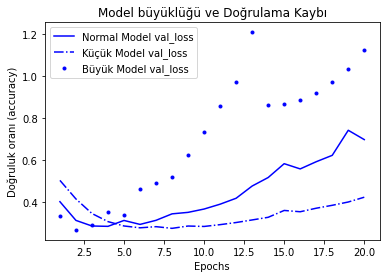

In [29]:
epochs = range(1, len(val_loss_1) + 1)

plt.plot(epochs,val_loss_1, "b", label="Normal Model val_loss")
plt.plot(epochs,val_loss_2, "b-.", label="Küçük Model val_loss")
plt.plot(epochs,val_loss_3, "b.", label="Büyük Model val_loss")
plt.title("Model büyüklüğü ve Doğrulama Kaybı")
plt.xlabel("Epochs")
plt.ylabel("Kayıp (loss)")
plt.legend()
plt.show()

In [30]:
# REGULASYON
from tensorflow.keras import regularizers

In [ ]:
model = keras.Sequential([
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

reg_L2 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

In [32]:
val_loss_1 = history_1.history["val_loss"]
val_loss_regL2 = reg_L2.history["val_loss"]

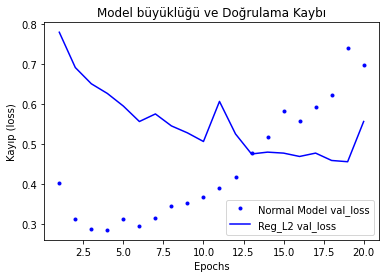

In [33]:
epochs = range(1, len(val_loss_1) + 1)

plt.plot(epochs,val_loss_1, "b.", label="Normal Model val_loss")
plt.plot(epochs,val_loss_regL2, "b-", label="Reg_L2 val_loss")
plt.title("Model büyüklüğü ve Doğrulama Kaybı")
plt.xlabel("Epochs")
plt.ylabel("Kayıp (loss)")
plt.legend()
plt.show()

In [34]:
# DROPOUT
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5),
                          layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

hist_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.6181 - accuracy: 0.6556 - val_loss: 0.5002 - val_accuracy: 0.8438
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.4978 - accuracy: 0.7817 - val_loss: 0.3970 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4124 - accuracy: 0.8381 - val_loss: 0.3388 - val_accuracy: 0.8731
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3507 - accuracy: 0.8735 - val_loss: 0.3128 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3021 - accuracy: 0.8961 - val_loss: 0.2917 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2608 - accuracy: 0.9118 - val_loss: 0.2718 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2295 - accuracy: 0.9257 - val_loss: 0.2740 - val_accuracy: 0.8936
Epoch 8/20
30

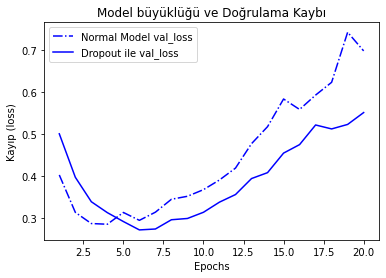

In [36]:
val_loss_1 = history_1.history["val_loss"]
val_loss_droput = hist_dropout.history["val_loss"]

epochs = range(1, len(val_loss_1) + 1)
plt.plot(epochs,val_loss_1, "b-.", label="Normal Model val_loss")
plt.plot(epochs,val_loss_droput, "b-", label="Dropout ile val_loss")
plt.title("Model büyüklüğü ve Doğrulama Kaybı")
plt.xlabel("Epochs")
plt.ylabel("Kayıp (loss)")
plt.legend()
plt.show()

In [ ]:
# MAKİNE ÖĞRENMESİNİN GENEL İŞ AKIŞI
# ! veri seti ile değil, problem tanımı ile başlanmalıdır.
# 1. Yapılacak işi tanımla (model ne tür bir iş yapacak?)
# 2. Verisetinin toplanması (Modelin eğitim ve testi için)
# 3. Verinin anlaşılması (kullanılacak verinin özellikleri, yeterince temsil gücünün olup olmadığı, vb)
# 4. Başarı ölçünütün belirlenmesi (Model başarısını nasıl ölçeceğiz?)
# 5. Verinin hazırlanması (Normalizasyon, vektörizasyon, eksik verilerin nasıl işleneceği (atılması veya yerlerine uygun değer konulması gibi))
# 6. Bir değerlendirme protokolünün seçilmesi (doğrulama seti veya K-fold cross-validation?)
# 7. Model başarısı için minimum bir kriter belirlenmeli (Model hangi başarılı tahmin değerini geçerse başarılı kabul edilecek)
# 8. Overfit'e ulaşan bir model geliştirilmeli (Overfit'e ulaşmayan bir model, hala underfit aşamasında olabilir. Optimum model, overfit'in başladığı noktadır.)
#   ! Model overfit için (a) ek katman eklenebilir, (b) katmanlar büyütülebilir (node sayıları arttırılabilir), (c) Daha büyük epochs değerleri ile model fit edilebilir.
# 9. Regulasyon ile modelin tune edilmesi
# 10. Modelin test edilmesi
# 11. Modelin deploy edilmesi (kullanıma açılması)
# 12. Deploy edilen modelin takip edilmesi
# 13. Modelin bakımı (modelin geliştirildiği eğitim veri ve test setleri güncelliğini yitirmiş olabilir.)

In [37]:
# KERAS MODELİ OLUŞTURMAK İÇİN FARKLI BİR YÖNTEMLER

In [40]:
# Seçenek-1:
model1 = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(10, activation="softmax")
])

In [46]:
# Seçenek-2 (katman eklemeli - incremental)
model2 = keras.Sequential()
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(32,activation="relu"))
model2.add(layers.Dense(10,activation="softmax"))

In [47]:
# Yukarıdaki model1 ve model2 tamamen aynıdır.
model1.build(input_shape=(None,3))
model2.build(input_shape=(None,3))

In [48]:
model1.summary() # bir modelin özel bilgisi

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                256       
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,666
Trainable params: 2,666
Non-trainable params: 0
_________________________________________________________________


In [49]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                256       
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,666
Trainable params: 2,666
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.weights # bir modelin ağırlık parametrelerini listelemek için

[<tf.Variable 'dense_35/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.22432011,  0.23539156,  0.0449008 , -0.08250324, -0.06937174,
         -0.21223855, -0.12201859,  0.24576485, -0.11684412,  0.18644062,
          0.27942777,  0.27701038,  0.11409295,  0.25560945,  0.00834343,
         -0.2446036 ,  0.2792698 ,  0.03275368,  0.07610431, -0.14944018,
         -0.10943682,  0.22769684,  0.19391689, -0.18767485,  0.17416257,
          0.14362824, -0.22397122, -0.05328625,  0.09192979,  0.01177147,
         -0.06157048, -0.23214912,  0.27082813, -0.01397061,  0.15990442,
         -0.17954545, -0.01893368, -0.25577784,  0.12204835, -0.22394238,
          0.10458454, -0.22199246,  0.1454413 ,  0.24057716, -0.09285526,
         -0.07338326, -0.10769552,  0.06015393,  0.29697376, -0.0857203 ,
          0.1179401 , -0.16593008, -0.17679365, -0.21725434, -0.24078466,
         -0.02234158,  0.02100524,  0.08096942,  0.1790458 ,  0.02953234,
         -0.274151  , -0.24133253, -0.2250

In [ ]:
# TENSORBOARD
# 